/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

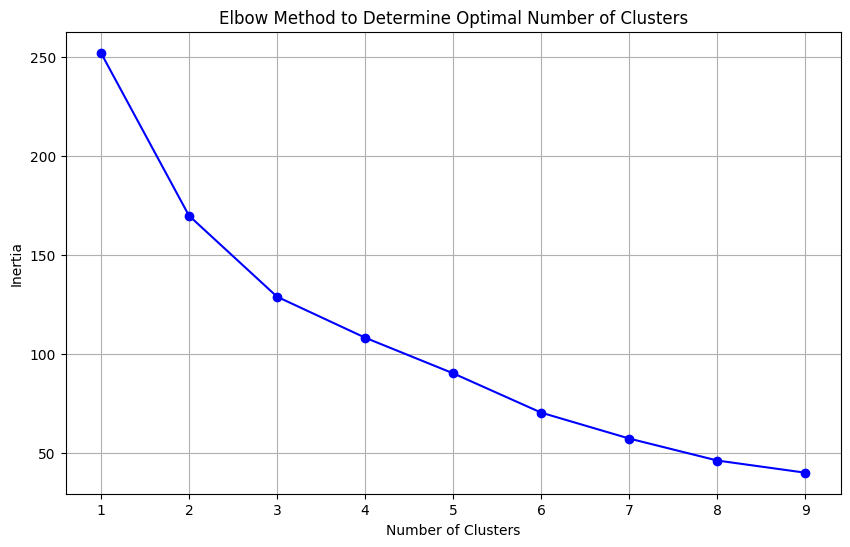

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


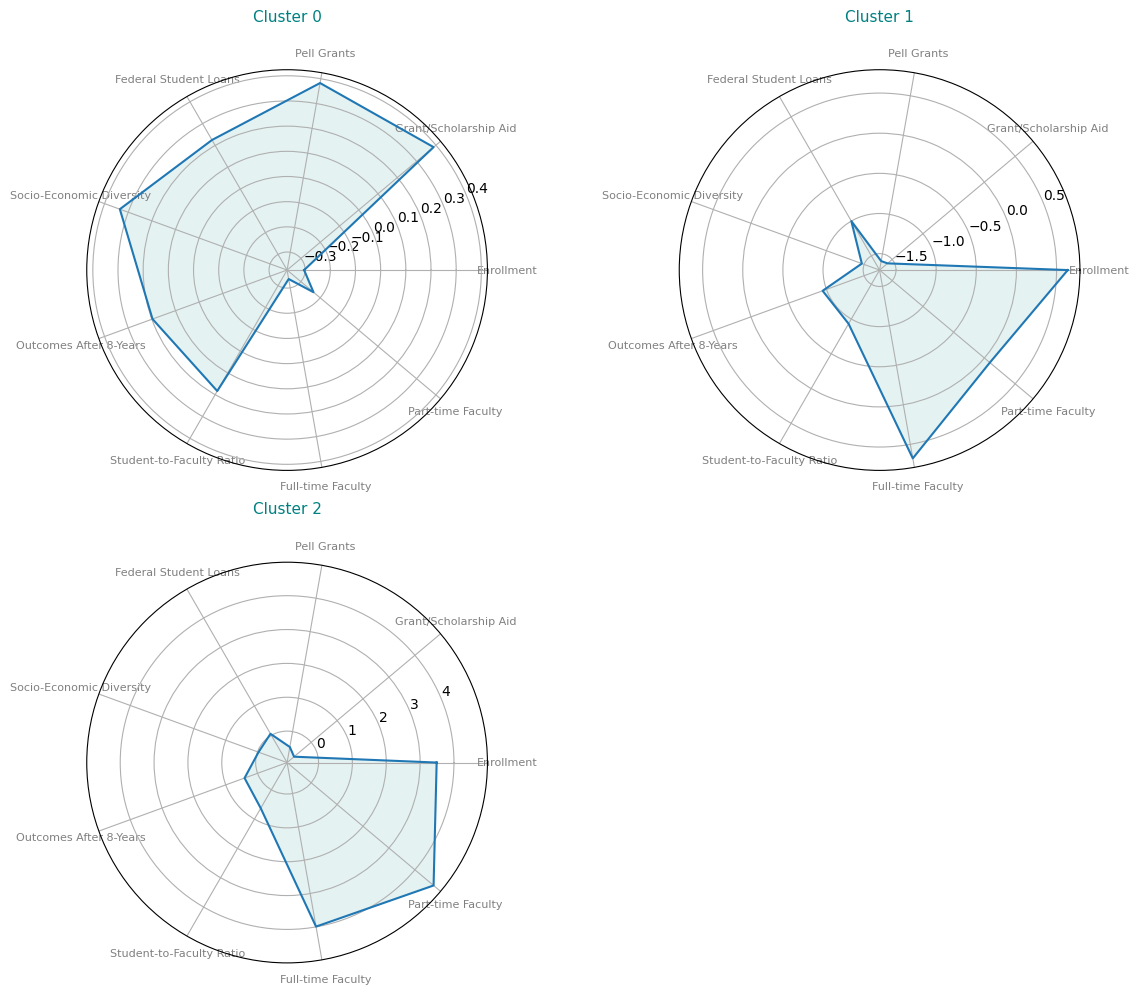

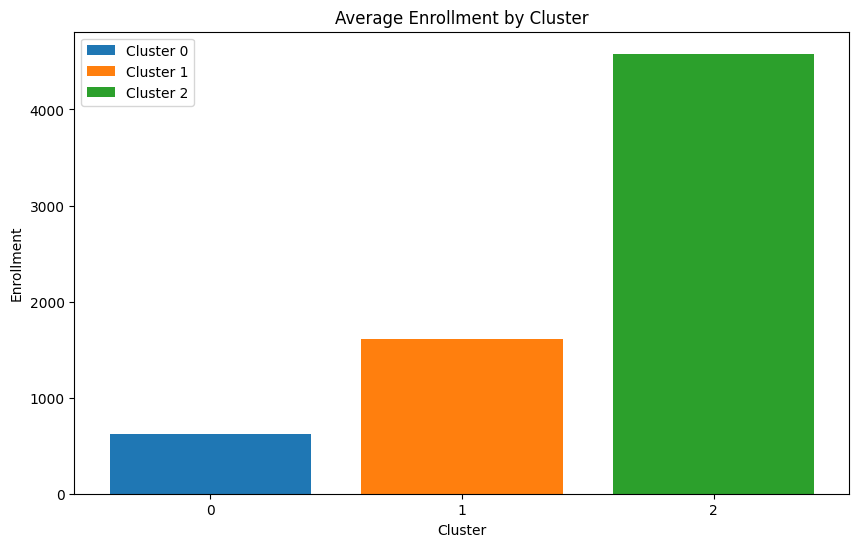

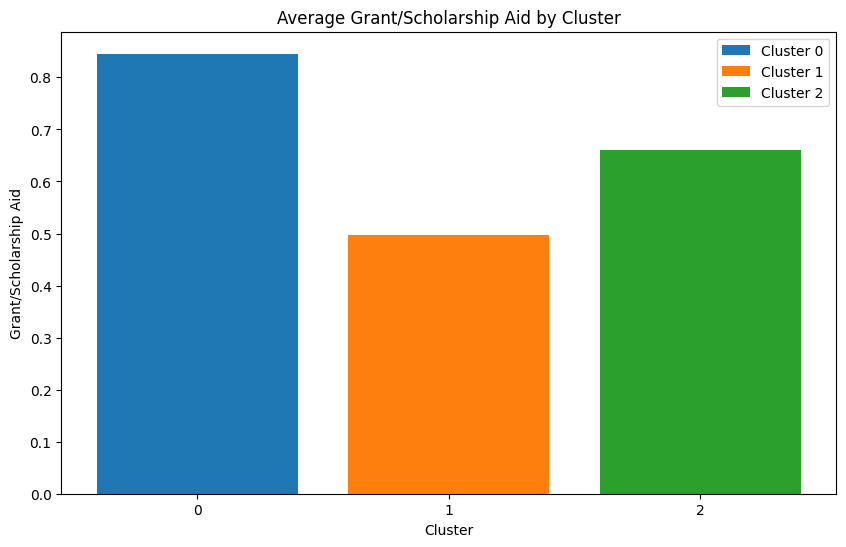

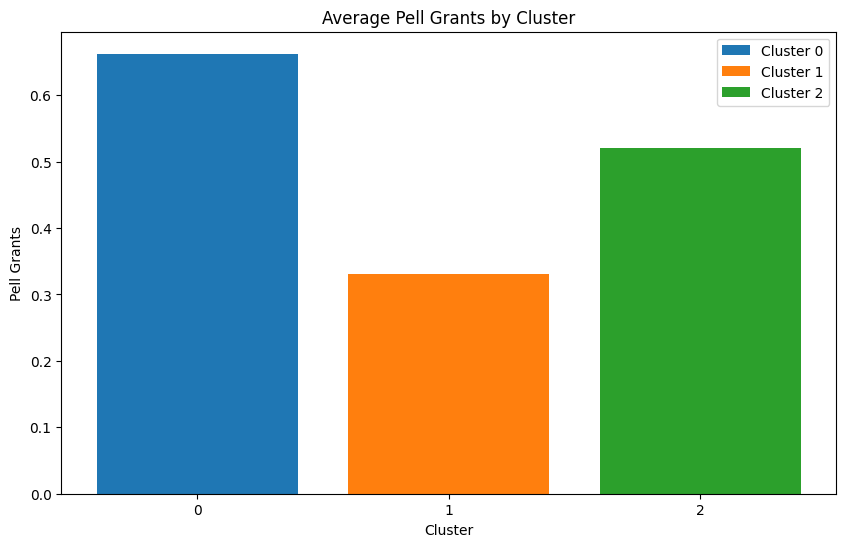

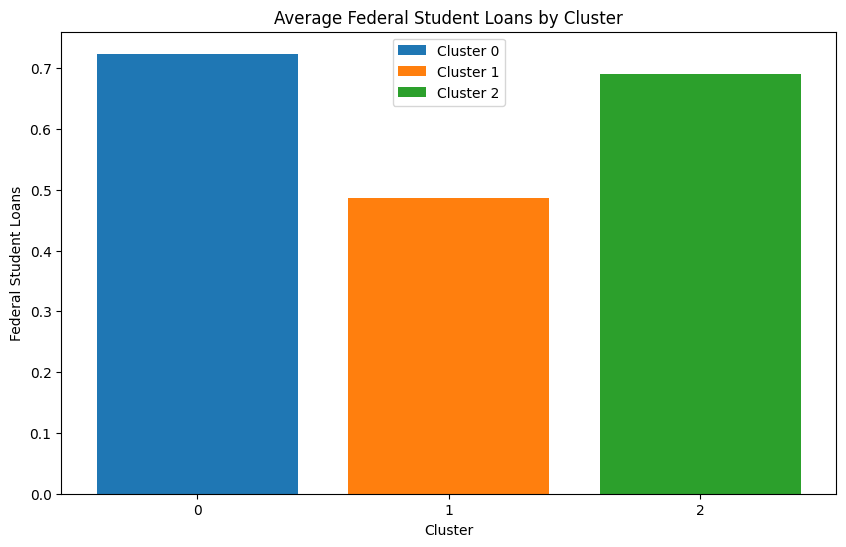

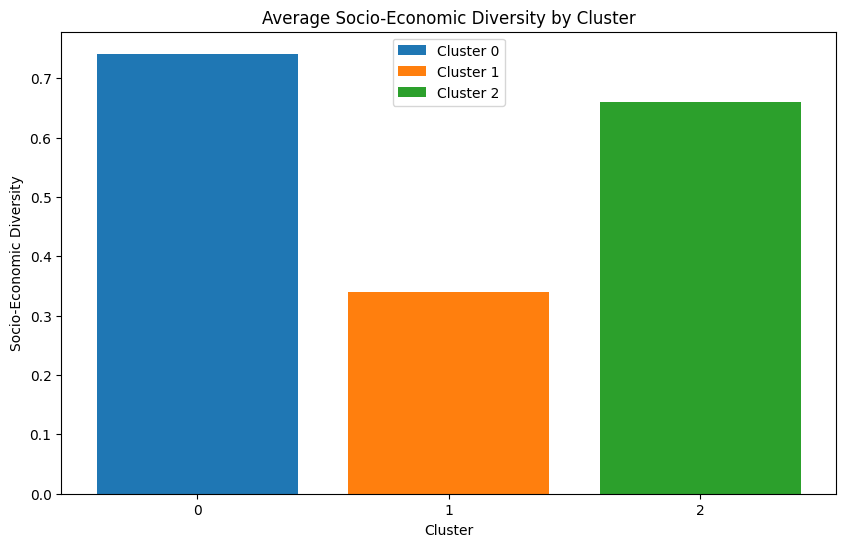

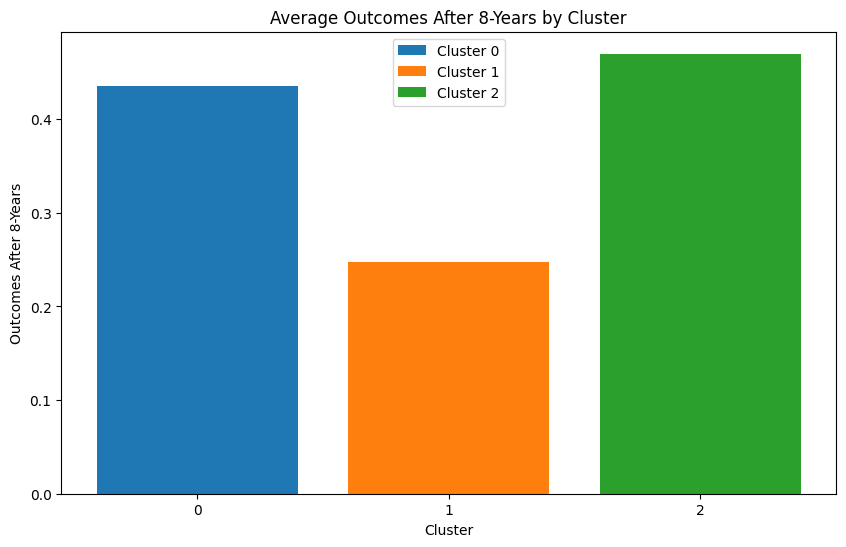

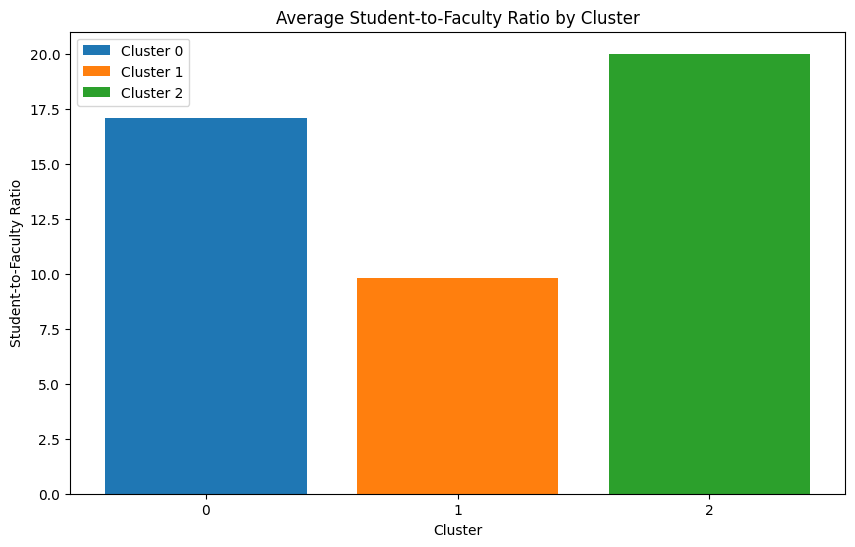

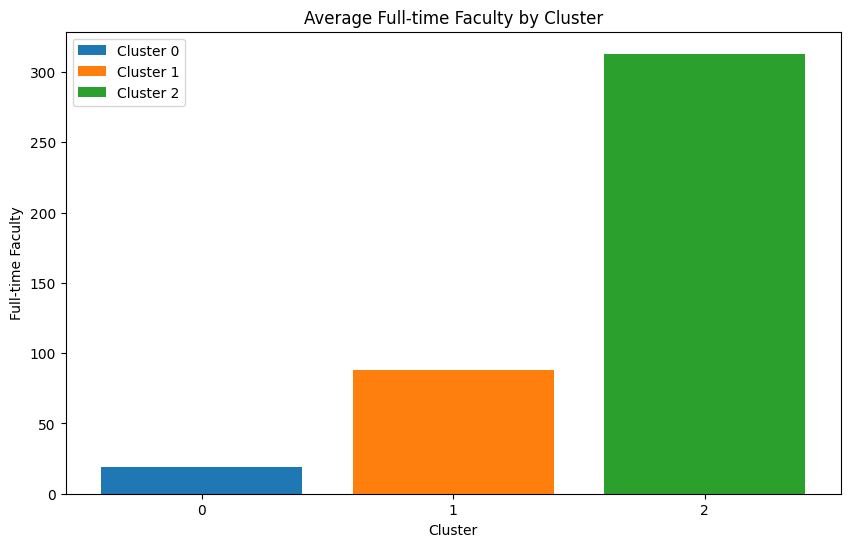

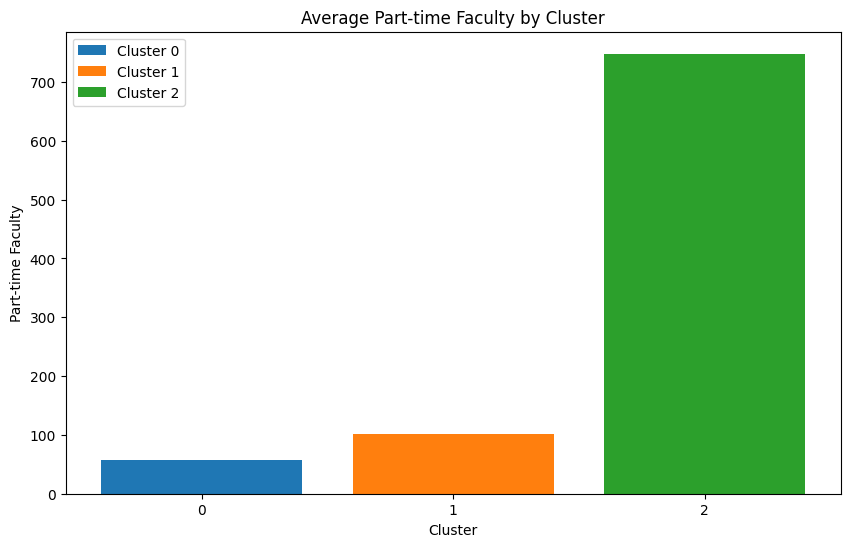

"\nCluster 0:\nInstitutions: Beal University, Bryan University, American Institute of Alternative Medicine, Angeles College, Felbry College, Huertas College, Platt College - Ontario, Platt College - Riverside, Professional Skills Institute, Rasmussen University - North Dakota, Rasmussen University - Wisconsin, South University - Columbia, South University - Montgomery, South University - Richmond, South University - Tampa, St. Louis College of Health Careers -Fenton, Bryant & Stratton College - Greece, Bryant & Stratton College - Parma, Bryant & Stratton College - Syracuse North, Bryant & Stratton College - Virginia Beach, Laurus College, Rasmussen University - Illinois\nAverage Enrollment: 623.86\nAverage Grant/Scholarship Aid: 0.85\nAverage Pell Grants: 0.66\nAverage Federal Student Loans: 0.72\nAverage Socio-Economic Diversity: 0.74\nAverage Outcomes After 8-Years: 0.44\nAverage Student-to-Faculty Ratio: 17.09\nAverage Full-time Faculty: 18.95\nAverage Part-time Faculty: 57.14\n\n\n

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from math import pi

# Load the dataset
file_path = '/content/Beal University Data Analysis (1).xlsx'
data = pd.read_excel(file_path)

# Preprocess the data
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data_cleaned = data.drop(index=0)
relevant_columns = ['Enrollment', 'Grant/Scholarship Aid', 'Pell Grants', 'Federal Student Loans',
                    'Socio-Economic Diversity', 'Outcomes After 8-Years',
                    'Student-to-Faculty Ratio', 'Full-time Faculty', 'Part-time Faculty']
data_cleaned['Student-to-Faculty Ratio'] = data_cleaned['Student-to-Faculty Ratio'].str.split(':').str[0].astype(float)
data_cleaned = data_cleaned.replace('Data Not Available', np.nan)
data_cleaned = data_cleaned.dropna(subset=relevant_columns)
data_for_clustering = data_cleaned[relevant_columns]
data_for_clustering = data_for_clustering.apply(pd.to_numeric, errors='coerce').dropna()

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Elbow Method to determine optimal number of clusters
inertia = []
range_values = range(1, 10)
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, 'o-', color='blue')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_values)
plt.grid(True)
plt.show()

# Determine optimal clusters visually and perform clustering
optimal_clusters = 3  # Adjust based on Elbow Method plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Adding cluster labels to the data
data_clustered = data_for_clustering.copy()
data_clustered['Cluster'] = clusters
data_clustered['Institution'] = data_cleaned['Institutions']

# Function to create a radar chart for each cluster
def create_radar_chart(cluster_number, cluster_data, features):
    num_vars = len(features)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]
    values = cluster_data.values.tolist()
    values += values[:1]
    ax = plt.subplot(2, 2, cluster_number + 1, polar=True)
    plt.xticks(angles[:-1], features, color='grey', size=8)
    ax.plot(angles, values)
    ax.fill(angles, values, 'teal', alpha=0.1)
    plt.title('Cluster ' + str(cluster_number), size=11, color='teal', y=1.1)

# Radar charts for each cluster
plt.figure(figsize=(12, 10))
cluster_centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(cluster_centroids, columns=relevant_columns)
for i in range(optimal_clusters):
    create_radar_chart(i, centroids_df.iloc[i, :], relevant_columns)
plt.tight_layout()
plt.show()

# Bar graphs for each feature per cluster
for col in relevant_columns:
    plt.figure(figsize=(10, 6))
    for cluster in range(optimal_clusters):
        subset = data_clustered[data_clustered['Cluster'] == cluster]
        plt.bar(str(cluster), subset[col].mean(), label=f'Cluster {cluster}')
    plt.title(f'Average {col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.legend()
    plt.show()

# Generating a short report
report = ""
for cluster_num in range(optimal_clusters):
    cluster_data = data_clustered[data_clustered['Cluster'] == cluster_num]
    institutions = cluster_data['Institution'].tolist()
    report += f"\nCluster {cluster_num}:\n"
    report += f"Institutions: {', '.join(institutions)}\n"
    for col in relevant_columns:
        average_value = cluster_data[col].mean()
        report += f"Average {col}: {average_value:.2f}\n"
    report += "\n"

report
